In [ ]:
# Importar la biblioteca folium
import folium

# Crear el mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Mostrar el mapa y permitir la selección de dos puntos
coordenadas_seleccionadas = []
while len(coordenadas_seleccionadas) < 2:
    coordenadas = input("Selecciona un punto en el mapa (latitud, longitud): ")
    latitud, longitud = [float(c.strip()) for c in coordenadas.split(",")]
    coordenadas_seleccionadas.append([latitud, longitud])
    folium.Marker(location=[latitud, longitud]).add_to(mapa)

# Crear una línea que conecte los dos puntos seleccionados
ruta = folium.PolyLine(locations=coordenadas_seleccionadas, color='green')
ruta.add_to(mapa)

# Mostrar el mapa con los dos puntos y la ruta
mapa

Selecciona un punto en el mapa (latitud, longitud): -4, -8
Selecciona un punto en el mapa (latitud, longitud): -4, -72


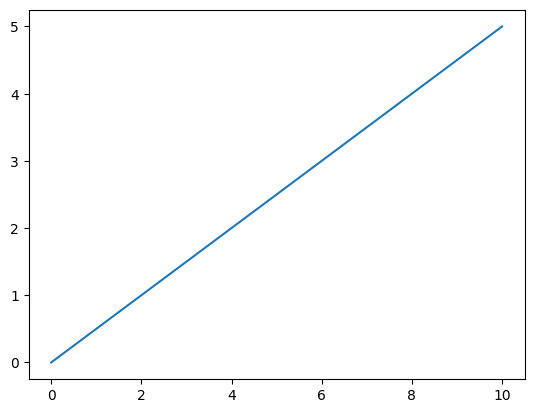

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# coordenadas de los dos puntos
x = np.array([0, 10])
y = np.array([0, 5])

# distancia entre los dos puntos
dist = np.sqrt((x[1]-x[0])**2 + (y[1]-y[0])**2)

# pendiente máxima permitida en Colombia
pendiente_max = 1

# pendiente entre los dos puntos
pendiente = (y[1]-y[0])/dist

# verificar si la pendiente es menor o igual que la pendiente máxima permitida
if pendiente <= pendiente_max:
    # graficar línea que une los dos puntos
    plt.plot(x, y)
else:
    print("La pendiente es mayor que la pendiente máxima permitida en Colombia")

# mostrar la gráfica resultante
plt.show()

In [ ]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

def unir_puntos_mapa(origen, destino):
    # Lee el archivo de límites geográficos de los departamentos de Colombia
    departamentos = gpd.read_file("/content/drive/MyDrive/PROGRAMACIÓN II/15 DE MARZO/Copia de COL_Municipio.zip")

    #Cambiamos de puntos
    departamentos_mundial = departamentos.to_crs("EPSG:4326")
    departamentos_mundial.crs

    # Crea un objeto GeoDataFrame con las ubicaciones
    ubicaciones = gpd.GeoDataFrame(geometry=gpd.points_from_xy([origen['lon'], destino['lon']], 
                                                               [origen['lat'], destino['lat']]))

    # Crea una figura y un eje para el mapa
    fig, ax = plt.subplots(figsize=(8, 8))

    # Dibuja los límites geográficos de los departamentos
    departamentos_mundial.plot(ax=ax, color='white', edgecolor='black')

    # Dibuja las ubicaciones en el mapa
    ubicaciones.plot(ax=ax, marker='o', color='red', markersize=50)

    # Une las dos ubicaciones con una línea roja
    ax.plot([origen['lon'], destino['lon']], [origen['lat'], destino['lat']], color='red', linewidth=3)

    # Muestra el mapa
    print(plt.show())

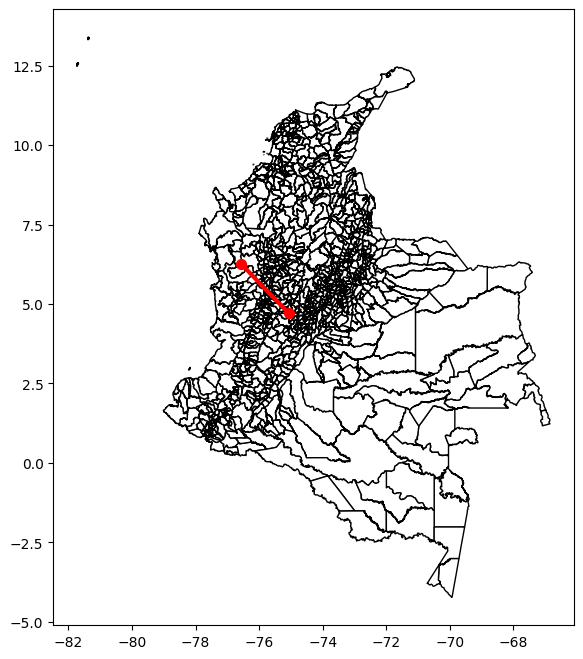

None


In [17]:
# Coordenadas de Bogotá
origen = {'lat': 4.710989, 'lon': -75.072092}

# Coordenadas de Medellín
destino = {'lat': 6.27053, 'lon': -76.572386}

# Llama a la función para unir los puntos en el mapa
unir_puntos_mapa(origen, destino)